<a href="https://colab.research.google.com/github/milindtanna/PRODIGY_ML_01/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [ ]:
# Load the dataset
train_data = pd.read_csv('train.csv')

# Display basic information about the dataset
print("Shape of training data:", train_data.shape)
print("Columns in training data:", train_data.columns)


Shape of training data: (1460, 81)
Columns in training data: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars',

In [ ]:
# Check for missing values
missing_values = train_data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Select features and target variable
features = ['BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Separate features and target
X = train_data[features]
y = train_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values (impute with mean)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


Missing values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_imputed, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train_imputed)

# Predictions on the test set
y_test_pred = model.predict(X_test_imputed)


In [ ]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Training R^2 Score:", train_r2)
print("Testing RMSE:", test_rmse)
print("Testing R^2 Score:", test_r2)

# Display predicted prices for the test set
predictions_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_test_pred
})
print("\nPredictions for the test set:")
print(predictions_df.head())


Training RMSE: 64305.36321802392
Training R^2 Score: 0.30670721591572925
Testing RMSE: 71052.56527708519
Testing R^2 Score: 0.3418184708071451

Predictions for the test set:
      Actual Price  Predicted Price
892         154500    134851.540505
1105        325000    214861.965063
413         115000    138680.411894
522         159000    214861.965063
1036        315500    218690.836452


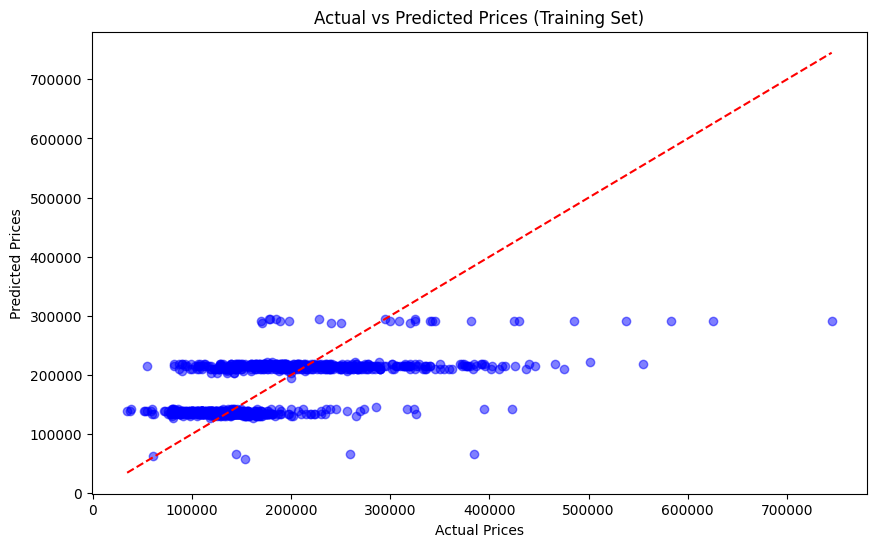

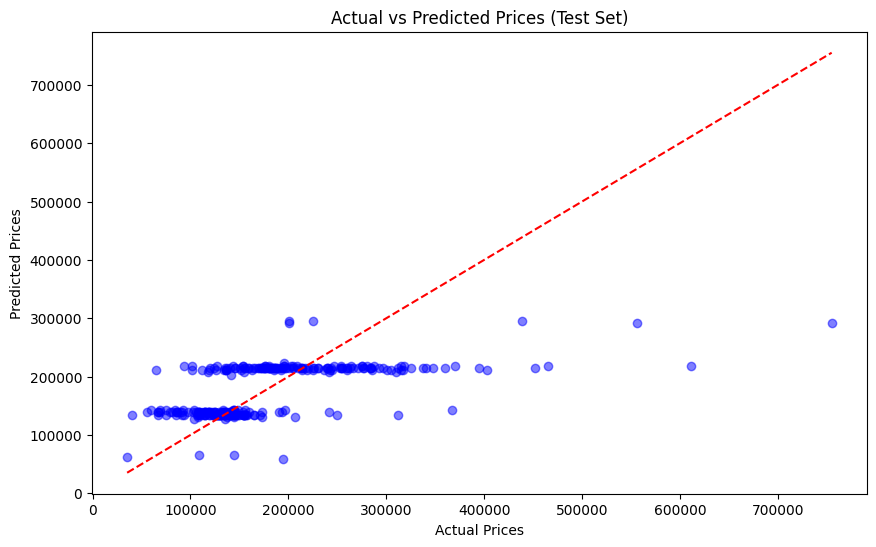

In [ ]:
# Scatter plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Training Set)')
plt.show()

# Scatter plot for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Test Set)')
plt.show()


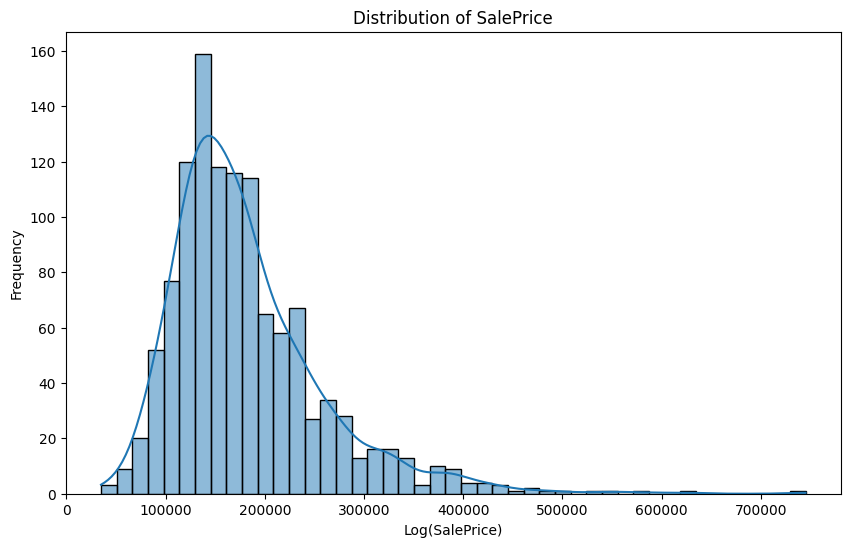

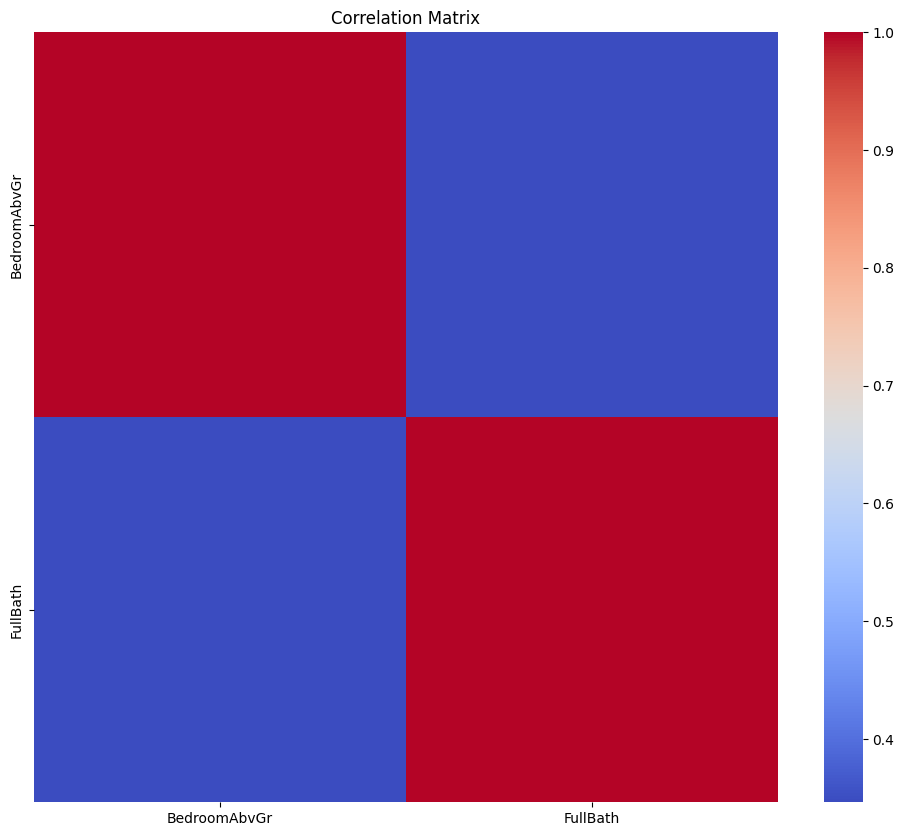

In [ ]:
# Explore the distribution of the target variable (log-transformed SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Take user input for the number of bedrooms and bathrooms
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of full bathrooms: "))

# Create a DataFrame from the user input
new_data = {
    'BedroomAbvGr': [bedrooms],
    'FullBath': [bathrooms]
}
new_house = pd.DataFrame(new_data)

# Handle missing values if any
new_house_imputed = imputer.transform(new_house)

# Predict the price for the new house
predicted_price = model.predict(new_house_imputed)

print("\nPredicted Price for the New House:", predicted_price[0])


Enter the number of bedrooms: 5
Enter the number of full bathrooms: 2

Predicted Price for the New House: 207204.22228568594
